Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [28]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
import mlutils as ml
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [29]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [43]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

Tocnost modela: 1.0


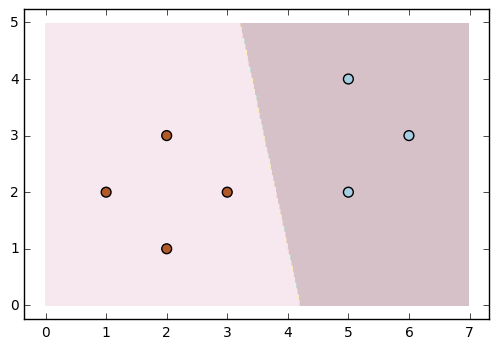

In [44]:
ridge = RidgeClassifier(alpha=0)
ridge.fit(seven_X, seven_y)
ml.plot_2d_clf_problem(seven_X, seven_y, lambda x : ridge.predict(x))
print "Tocnost modela:", accuracy_score(seven_y, ridge.predict(seven_X))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

Tocnost modela: 1.0


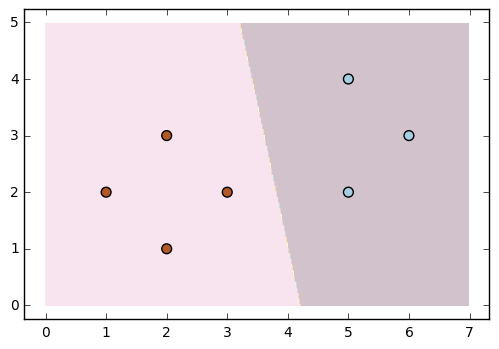

In [45]:
linear = LinearRegression()
linear.fit(seven_X, seven_y)
ml.plot_2d_clf_problem(seven_X, seven_y, lambda x : linear.predict(x) >= 0)
print "Tocnost modela:", accuracy_score(seven_y, [1 if x >= 0 else -1 for x in linear.predict(seven_X)])

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [50]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

Tocnost modela: 0.875


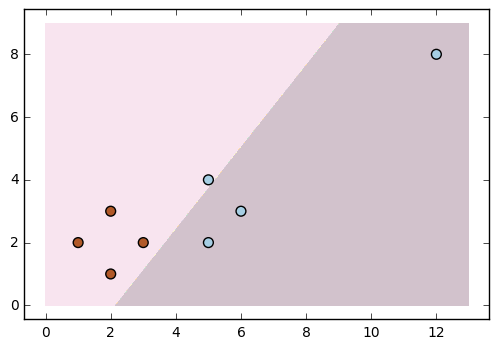

In [51]:
ridge = RidgeClassifier(alpha=0)
ridge.fit(outlier_X, outlier_y)
ml.plot_2d_clf_problem(outlier_X, outlier_y, lambda x : ridge.predict(x) >= 0)
print "Tocnost modela:", accuracy_score(outlier_y, ridge.predict(outlier_X))

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [52]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

Tocnost modela: 0.875


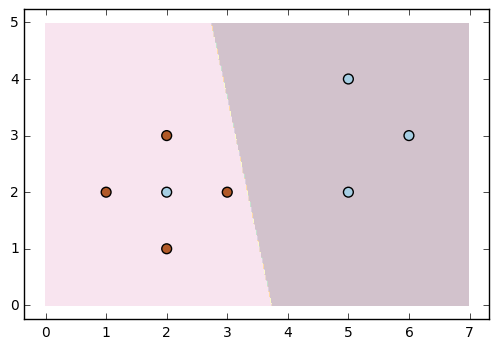

In [53]:
ridge = RidgeClassifier(alpha=0)
ridge.fit(unsep_X, unsep_y)
ml.plot_2d_clf_problem(unsep_X, unsep_y, lambda x : ridge.predict(x) >= 0)
print "Tocnost modela:", accuracy_score(unsep_y, ridge.predict(unsep_X))

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [54]:
from sklearn.datasets import make_classification

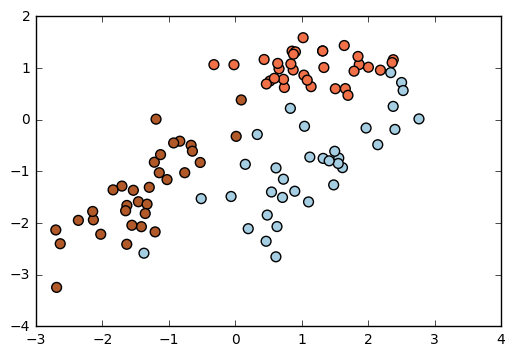

In [55]:
calsses_count = 3
X, y = make_classification(n_classes=calsses_count, n_redundant=0, 
                           n_clusters_per_class=1, n_features=2, random_state=24)
ml.plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

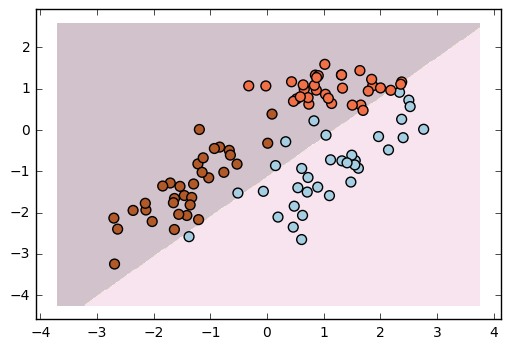

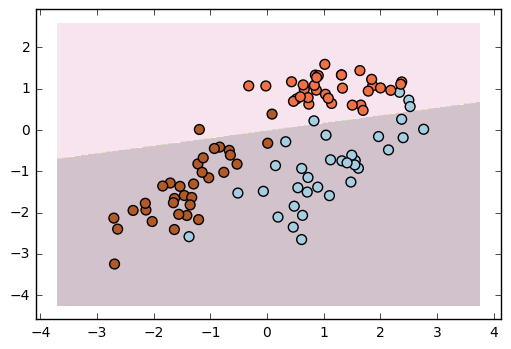

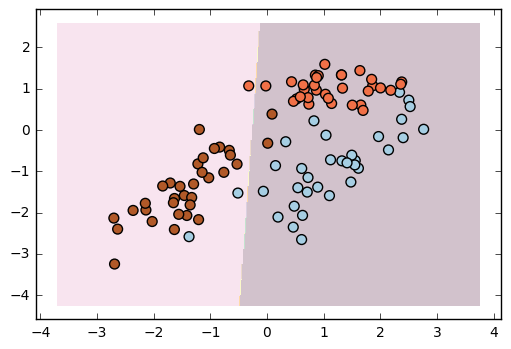

Tocnost modela (rucno): 0.94


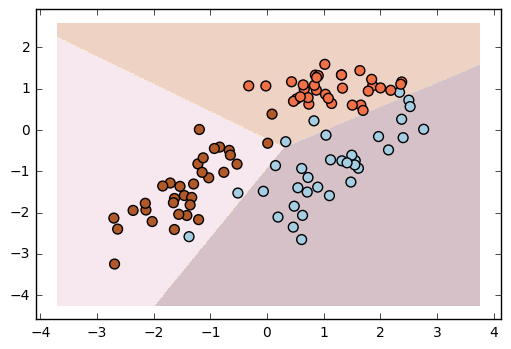

Tocnost modela (Ridge): 0.94


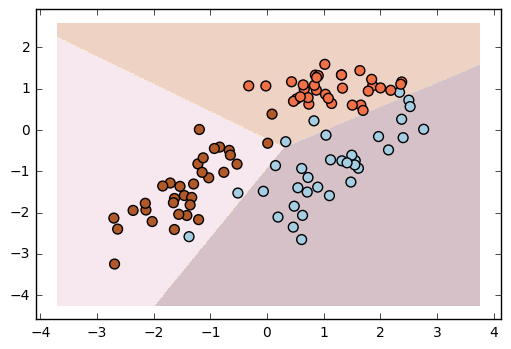

In [56]:
models = []
for value in range(calsses_count):
    y_copy = [1 if x == value else -1 for x in y]
    linear = LinearRegression()
    linear.fit(X, y_copy)
    models.append(linear)
    
    ml.plot_2d_clf_problem(X, y, lambda x : linear.predict(x) >= 0)
    plt.show()

def argmax(x, models):
    return sp.argmax(map(lambda model: model.predict(x), models))
def linearOVR(X):
    return np.array([argmax(x.reshape(1, -1), models) for x in X])

y_predict = np.array([argmax(x.reshape(1, -1), models) for x in X])
print "Tocnost modela (rucno):", accuracy_score(y, y_predict)
ml.plot_2d_clf_problem(X, y, linearOVR)
plt.show()

model = RidgeClassifier(alpha=0)
model.fit(X, y)
print "Tocnost modela (Ridge):", accuracy_score(y, model.predict(X))
ml.plot_2d_clf_problem(X, y, lambda x : model.predict(x))
plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [57]:
def sigm(x, a=1):
    return 1/(1+np.exp(-a*x))

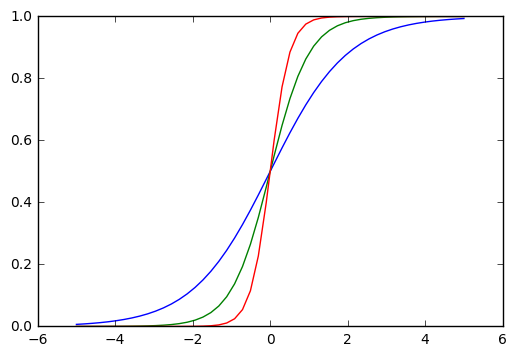

In [58]:
lspace = linspace(-5, 5)
for a in [1, 2, 4]:
    plt.plot(lspace, sigm(lspace, a))

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [59]:
from sklearn.metrics import log_loss

def lr_h(x, w):
    return sigm(x.dot(w[1:]) + w[0])

def cross_entropy_error(X, y, w):
    return log_loss(y, lr_h(X, w))

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False, online=False):
    print "Zapocinjem treniranje..."
    w = np.zeros(X.shape[1] + 1)
    traced = [w.copy()]    
    step, phi_X = 0, PolynomialFeatures(1).fit_transform(X)
    while step < max_iter:
        loss_old = cross_entropy_error(X, y, w)
        if online:
            phi_X_, y_ = unison_shuffled_copies(phi_X, y)
            for idx, x in enumerate(phi_X_):
                w[1:] = w[1:] * (1 - eta * alpha)
                w -= eta * (sigm(x.dot(w)) - y_[idx]) * x
        else:
            delta_w = (sigm(phi_X.dot(w)) - y).T.dot(phi_X)
            w[1:] = w[1:] * (1 - eta * alpha)         
            w -= eta * delta_w
        if trace: 
            traced.append(w.copy())
        loss_new = cross_entropy_error(X, y, w)
        step += 1
        if abs(loss_new - loss_old) < epsilon:
            break
    print "Treniranje gotovo, broj iteracija:", step, ", pogreska unakrsne entropije:", cross_entropy_error(X, y, w)
    return (w, np.array(traced)) if trace else w

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [60]:
def cross_entropy_error(X, y, w):
    return log_loss(y, lr_h(X, w))

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 947 , pogreska unakrsne entropije: 0.135218727202


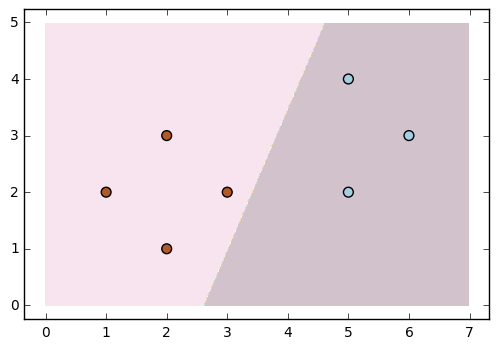

In [63]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
w, trace = lr_train(seven_X, seven_y, trace=True)
    
ml.plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w) >= 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [64]:
from sklearn.metrics import zero_one_loss

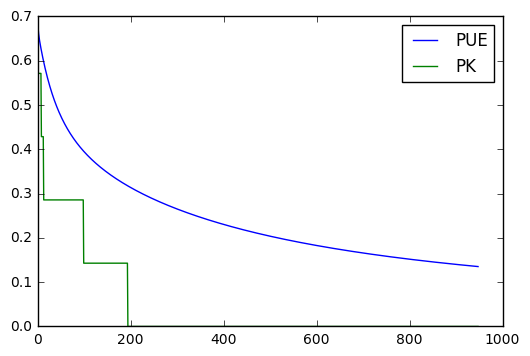

Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 1142 , pogreska unakrsne entropije: 0.188426376421
Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 947 , pogreska unakrsne entropije: 0.135218727202
Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 511 , pogreska unakrsne entropije: 0.0637998604986
Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 378 , pogreska unakrsne entropije: 0.0460447086902


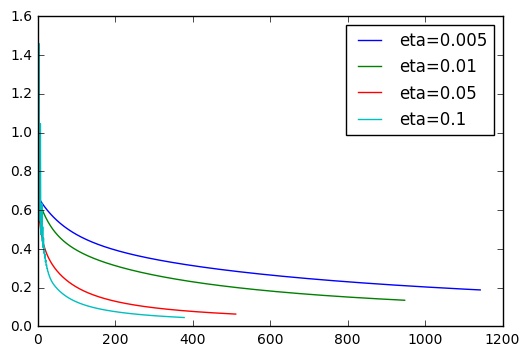

In [65]:
def zero_one_error(X, y, w):
    y_pred = map(lambda y: 1 if y >= 0.5 else 0, lr_h(X, w))
    return zero_one_loss(y, y_pred)

log_errors = []
class_errors = []
for w in trace:
    log_errors.append(cross_entropy_error(seven_X, seven_y, w))
    class_errors.append(zero_one_error(seven_X, seven_y, w))

plt.plot(range(len(trace)), log_errors, label="PUE")
plt.plot(range(len(trace)), class_errors, label="PK")
plt.legend()
plt.show()

for eta in [0.005,0.01,0.05,0.1]:
    _, newTrace = lr_train(seven_X, seven_y, trace=True, eta=eta)
    errors = []
    for w in newTrace:
        errors.append(cross_entropy_error(seven_X, seven_y, w))
    plt.plot(range(len(newTrace)), errors, label='eta=' + str(eta))
plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

Pogreska modela: 0.0474127727699


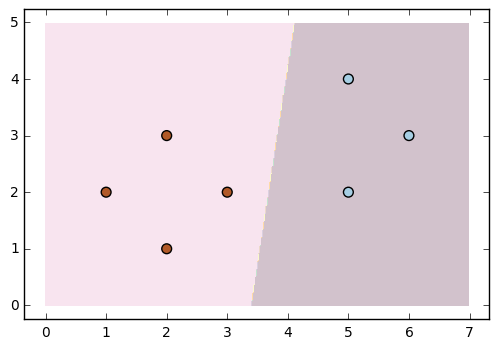

In [70]:
from sklearn.linear_model import LogisticRegression
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
log = LogisticRegression(max_iter=2000, C=100)
log.fit(seven_X, seven_y)

newW = [log.intercept_[0], log.coef_[0][0], log.coef_[0][1]]
print "Pogreska modela:", cross_entropy_error(seven_X, seven_y, newW)
ml.plot_2d_clf_problem(seven_X, seven_y, log.predict)

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 342 , pogreska unakrsne entropije: 0.0428939496732


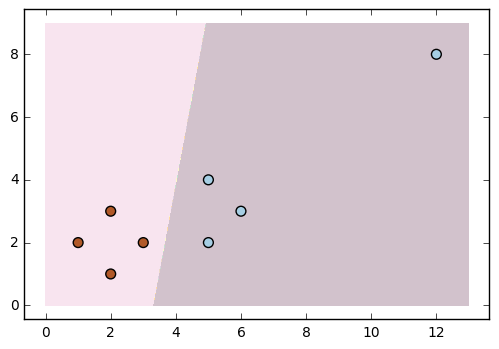

In [71]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)
w = lr_train(outlier_X, outlier_y, eta=0.1)
ml.plot_2d_clf_problem(outlier_X, outlier_y, (lambda x: lr_h(x,w) >= 0.5))

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 947 , pogreska unakrsne entropije: 0.135218727202


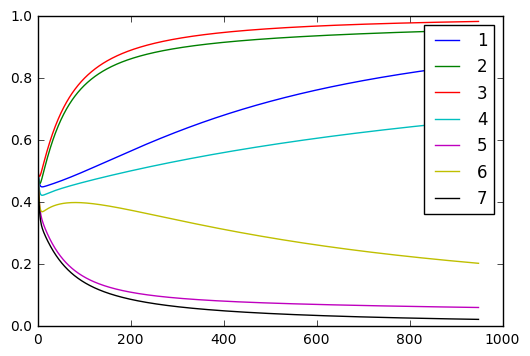

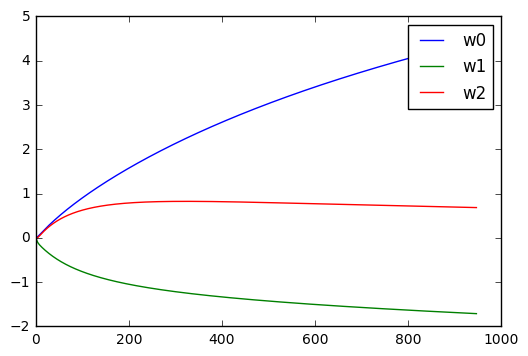

In [72]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
w, trace = lr_train(seven_X, seven_y, trace=True)

def lr_stats(X, trace):
    probs = np.array([zeros(len(X))])
    for i, w in enumerate(trace):
        current_probs = np.zeros(len(X))
        for j, p in enumerate(lr_h(X, w)):
            current_probs[j] = p
        probs = sp.append(probs, [current_probs], axis=0)

    for i in range(len(X)):
        plot(probs[:,i],label=i+1) 
    plt.legend() 
    plt.show()

    for i in range(trace.shape[1]):
        plt.plot(trace[:,i], label='w'+str(i))
    plt.legend()
    plt.show()
    
lr_stats(seven_X, trace)

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 454 , pogreska unakrsne entropije: 0.406352684514


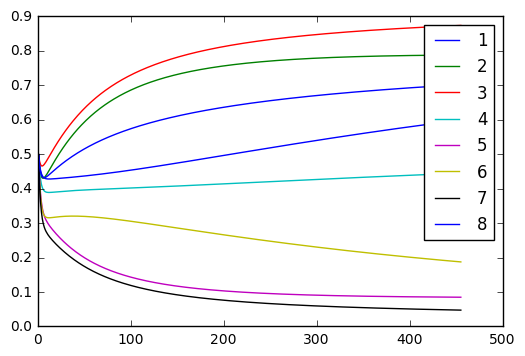

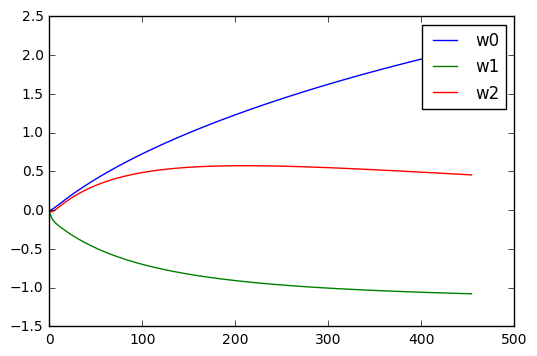

In [23]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

w, trace = lr_train(unsep_X, unsep_y, trace=True)
lr_stats(unsep_X, trace)

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 947 , pogreska unakrsne entropije: 0.135218727202
Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 804 , pogreska unakrsne entropije: 0.20193262952
Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 405 , pogreska unakrsne entropije: 0.43270691473
Zapocinjem treniranje...
Treniranje gotovo, broj iteracija: 4 , pogreska unakrsne entropije: 0.674167798498


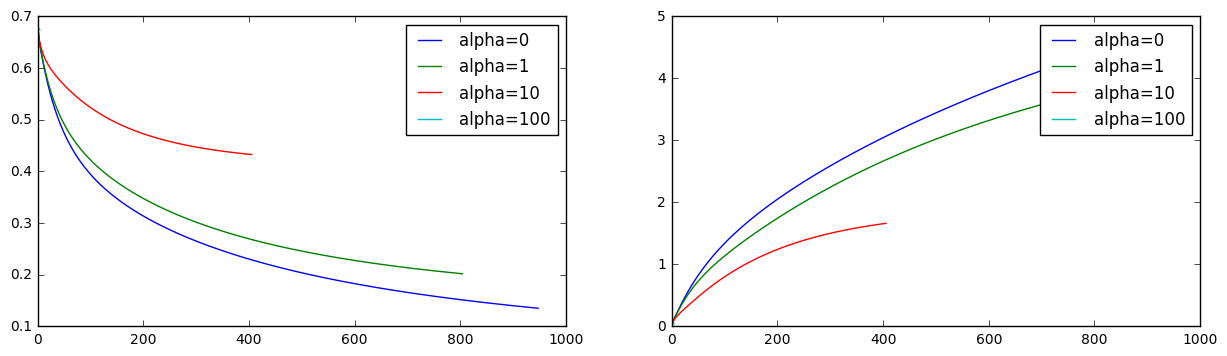

In [73]:
fig = plt.figure(2, figsize=(15,4))
for alpha in [0, 1, 10, 100]:
    w, trace = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    fig.add_subplot("121")
    entr_error = []
    norms = []
    for w in trace:
        norms.append(norm(w))
        entr_error.append(cross_entropy_error(seven_X, seven_y, w))
    plt.plot(range(len(trace)), entr_error, label='alpha='+str(alpha))
    plt.legend()
    fig.add_subplot("122")
    plt.plot(range(len(trace)), norms, label='alpha='+str(alpha))
    plt.legend()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

d = 2 Pogreska unakrsne entropije: 0.0363322386805


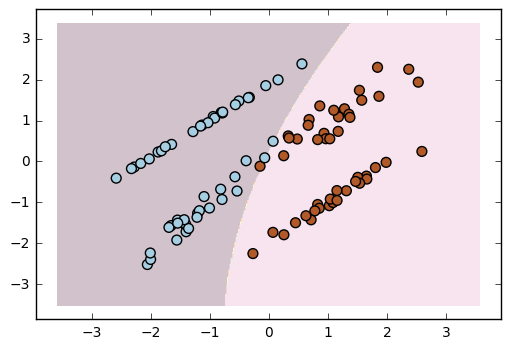

d = 3 Pogreska unakrsne entropije: 0.0341205763321


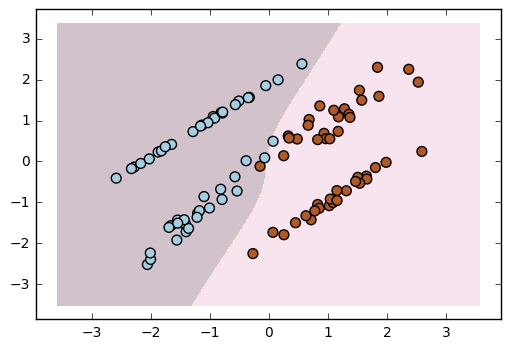

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=42)

def train_log(X, y, alpha, n):
    model = LogisticRegression(C=2**alpha)
    poly = PolynomialFeatures(n)
    phi_X = poly.fit_transform(X)
    model.fit(phi_X, y)
    return model, poly

for d in [2, 3]:
    model, poly = train_log(X, y, 4, d)
    print "d =", d, "Pogreska unakrsne entropije:", cross_entropy_error(poly.fit_transform(X)[:,1:], y, model.coef_[0])
    ml.plot_2d_clf_problem(X, y, (lambda x : model.predict(poly.transform(x))))
    plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

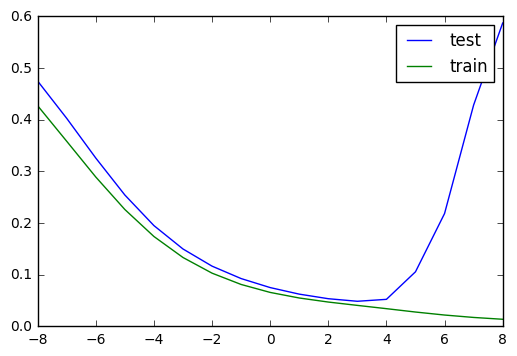

In [75]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=41)

test_error = []
train_error = []
for alpha in range(-8, 9):
    model, poly = train_log(X_train, y_train, alpha, 4)
    tr = cross_entropy_error(poly.fit_transform(X_train)[:,1:], y_train, model.coef_[0])
    ts = cross_entropy_error(poly.fit_transform(X_test)[:,1:], y_test, model.coef_[0])
    test_error.append(ts)
    train_error.append(tr)
plt.plot(range(-8, 9),test_error, label='test')
plt.plot(range(-8, 9),train_error, label='train')
plt.legend()

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?